In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("D:\PROGRAMMING AND SEO\Kaggle\Regression\Loan\Loan-Prediction-Dataset-master\Loan-Prediction-Dataset-master\ltrain.csv")
print("Dataset")
df.head()

Dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 43.2+ KB


In [3]:
print("Statistical Information:\n")
df.describe()

Statistical Information:



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


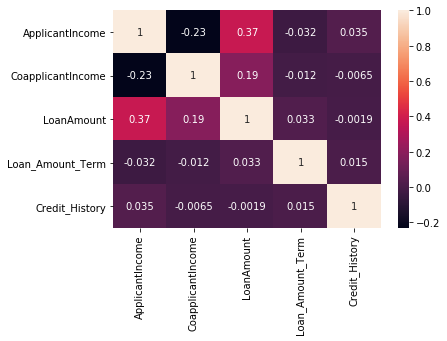

In [4]:
corr1=df.corr(method='kendall')
sns.heatmap(corr1,annot=True)

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

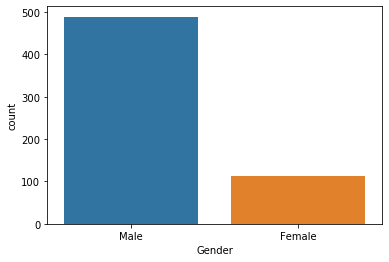

In [6]:
sns.countplot(x="Gender",data=df)

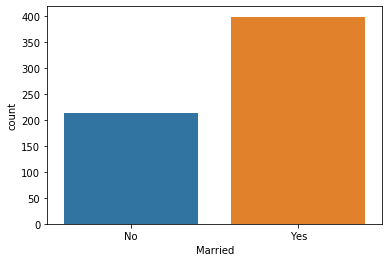

In [7]:
sns.countplot(x="Married",data=df)

In [8]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

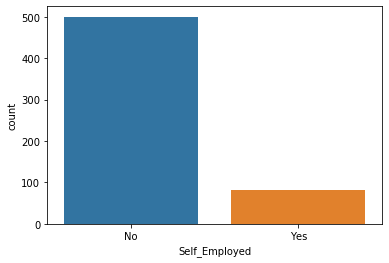

In [9]:
sns.countplot(df['Self_Employed'])

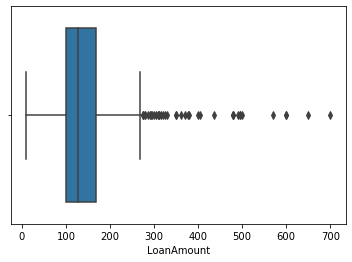

In [10]:
sns.boxplot(df['LoanAmount'])

In [11]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [12]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [13]:
df.Gender.fillna('Male',inplace=True)
df.Married.fillna('Yes',inplace=True)
df.Dependents.fillna('0',inplace=True)
df.Self_Employed.fillna('No',inplace=True)
df.LoanAmount.fillna(df.LoanAmount.mean(),inplace=True)
df.Loan_Amount_Term.fillna('360.0',inplace=True)
df.Credit_History.fillna('1.0',inplace=True)

In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

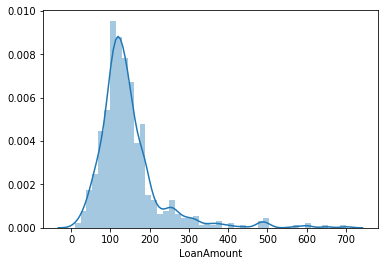

In [15]:
sns.distplot(df['LoanAmount'])

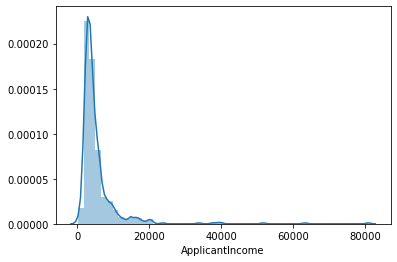

In [16]:
sns.distplot(df['ApplicantIncome'])

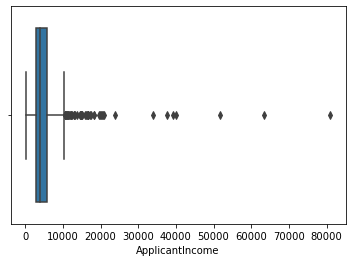

In [17]:
sns.boxplot(df['ApplicantIncome'])

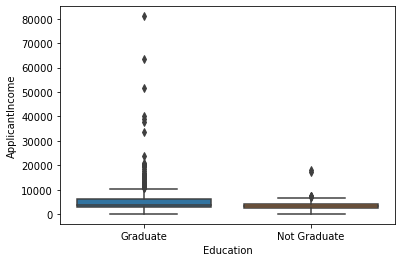

In [18]:
sns.boxplot(x="Education",y="ApplicantIncome",data=df)

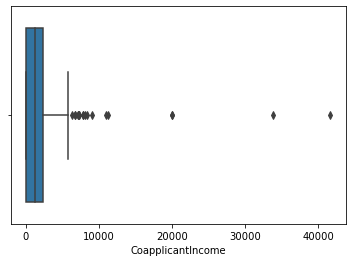

In [19]:
sns.boxplot(df['CoapplicantIncome'])

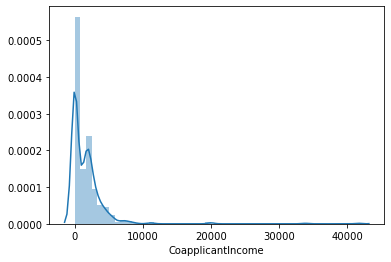

In [20]:
sns.distplot(df['CoapplicantIncome'])

In [40]:
df1=pd.get_dummies(df,columns=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status','Dependents'],drop_first=True)

In [41]:
df1.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,LP001002,5849,0.0,146.412162,360,1,1,0,0,0,0,1,1,0,0,0
1,LP001003,4583,1508.0,128.000000,360,1,1,1,0,0,0,0,0,1,0,0
2,LP001005,3000,0.0,66.000000,360,1,1,1,0,1,0,1,1,0,0,0
3,LP001006,2583,2358.0,120.000000,360,1,1,1,1,0,0,1,1,0,0,0
4,LP001008,6000,0.0,141.000000,360,1,1,0,0,0,0,1,1,0,0,0


In [42]:
df1.isnull().sum()

Loan_ID                    0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
Loan_Status_Y              0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
dtype: int64

In [43]:
df1.drop(columns=['Loan_ID'],inplace=True)
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,146.412162,360,1,1,0,0,0,0,1,1,0,0,0
1,4583,1508.0,128.000000,360,1,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360,1,1,1,0,1,0,1,1,0,0,0
3,2583,2358.0,120.000000,360,1,1,1,1,0,0,1,1,0,0,0
4,6000,0.0,141.000000,360,1,1,0,0,0,0,1,1,0,0,0


In [44]:
df1.dtypes

ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term            object
Credit_History              object
Gender_Male                  uint8
Married_Yes                  uint8
Education_Not Graduate       uint8
Self_Employed_Yes            uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Loan_Status_Y                uint8
Dependents_1                 uint8
Dependents_2                 uint8
Dependents_3+                uint8
dtype: object

In [45]:
df1.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,146.412162,360,1,1,0,0,0,0,1,1,0,0,0
1,4583,1508.0,128.000000,360,1,1,1,0,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360,1,1,1,0,1,0,1,1,0,0,0
3,2583,2358.0,120.000000,360,1,1,1,1,0,0,1,1,0,0,0
4,6000,0.0,141.000000,360,1,1,0,0,0,0,1,1,0,0,0


In [47]:
y=df1.iloc[:,[11]]
y

,Loan_Status_Y
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [48]:
x=df1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,12,13,14]]
x

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Dependents_1,Dependents_2,Dependents_3+
0,5849,0.0,146.412162,360,1,1,0,0,0,0,1,0,0,0
1,4583,1508.0,128.000000,360,1,1,1,0,0,0,0,1,0,0
2,3000,0.0,66.000000,360,1,1,1,0,1,0,1,0,0,0
3,2583,2358.0,120.000000,360,1,1,1,1,0,0,1,0,0,0
4,6000,0.0,141.000000,360,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.000000,360,1,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.000000,180,1,1,1,0,0,0,0,0,0,1
611,8072,240.0,253.000000,360,1,1,1,0,0,0,1,1,0,0
612,7583,0.0,187.000000,360,1,1,1,0,0,0,1,0,1,0


In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(491, 14)

In [52]:
x_test.shape

(123, 14)

In [53]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

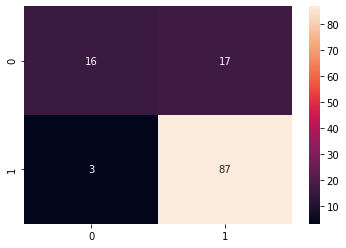

In [55]:
y_pred=mod.predict(x_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

precision    recall  f1-score   support

           0       0.84      0.48      0.62        33
           1       0.84      0.97      0.90        90

    accuracy                           0.84       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.84      0.84      0.82       123



In [57]:
print("Training Score:\n",mod.score(x_train,y_train))
print("\nTesting Score:\n",mod.score(x_test,y_test))

Training Score:
 0.8065173116089613

Testing Score:
 0.8373983739837398


In [58]:
from sklearn.naive_bayes import GaussianNB
mod1=GaussianNB()
mod1.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

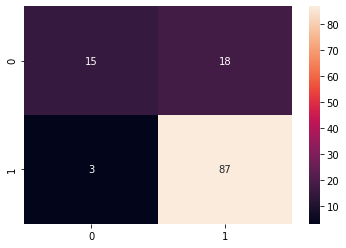

In [60]:
y_pred1=mod1.predict(x_test)
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm1,annot=True)

In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

precision    recall  f1-score   support

           0       0.83      0.45      0.59        33
           1       0.83      0.97      0.89        90

    accuracy                           0.83       123
   macro avg       0.83      0.71      0.74       123
weighted avg       0.83      0.83      0.81       123



In [62]:
print("Training Score:\n",mod1.score(x_train,y_train))
print("\nTesting Score:\n",mod1.score(x_test,y_test))

Training Score:
 0.790224032586558

Testing Score:
 0.8292682926829268


In [83]:
from sklearn.tree import DecisionTreeClassifier
mod2=DecisionTreeClassifier(criterion='gini',random_state=0)
mod2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

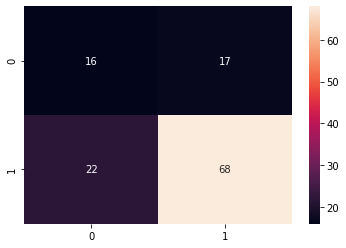

In [84]:
y_pred2=mod2.predict(x_test)
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_pred2)
sns.heatmap(cm2,annot=True)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred2))

precision    recall  f1-score   support

           0       0.42      0.48      0.45        33
           1       0.80      0.76      0.78        90

    accuracy                           0.68       123
   macro avg       0.61      0.62      0.61       123
weighted avg       0.70      0.68      0.69       123



In [86]:
print("Training Score:\n",mod2.score(x_train,y_train))
print("\nTesting Score:\n",mod2.score(x_test,y_test))

Training Score:
 1.0

Testing Score:
 0.6829268292682927


In [88]:
from sklearn.ensemble import RandomForestClassifier
mod3=RandomForestClassifier(n_estimators=100,random_state=0)
mod3.fit(x_test,y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

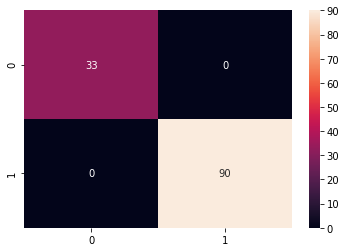

In [89]:
y_pred3=mod3.predict(x_test)
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_pred3)
sns.heatmap(cm3,annot=True)

In [90]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred3))

precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        90

    accuracy                           1.00       123
   macro avg       1.00      1.00      1.00       123
weighted avg       1.00      1.00      1.00       123



In [91]:
print("Training Score:\n",mod3.score(x_train,y_train))
print("\nTesting Score:\n",mod3.score(x_test,y_test))

Training Score:
 0.7678207739307535

Testing Score:
 1.0


In [99]:
models=['Logistics','Naive-Bayes','Decision-Tree','Random-Forest']
train_scr=[]
train_scr.append(mod.score(x_train,y_train))
train_scr.append(mod1.score(x_train,y_train))
train_scr.append(mod2.score(x_train,y_train))
train_scr.append(mod3.score(x_train,y_train))
train_scr




[0.8065173116089613, 0.790224032586558, 1.0, 0.7678207739307535]

In [101]:
test_scr=[]
test_scr.append(mod.score(x_test,y_test))
test_scr.append(mod1.score(x_test,y_test))
test_scr.append(mod2.score(x_test,y_test))
test_scr.append(mod3.score(x_test,y_test))
test_scr

[0.8373983739837398, 0.8292682926829268, 0.6829268292682927, 1.0]

In [106]:
compar=pd.DataFrame(columns=['Training','Testing'],index=models)
compar

,Training,Testing
Logistics,NaN,NaN
Naive-Bayes,NaN,NaN
Decision-Tree,NaN,NaN
Random-Forest,NaN,NaN


In [107]:
compar['Training']=train_scr
compar['Testing']=test_scr
compar

,Training,Testing
Logistics,0.806517,0.837398
Naive-Bayes,0.790224,0.829268
Decision-Tree,1.000000,0.682927
Random-Forest,0.767821,1.000000


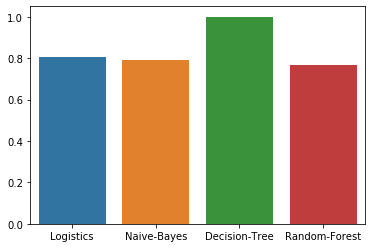

In [111]:
sns.barplot(models,train_scr)

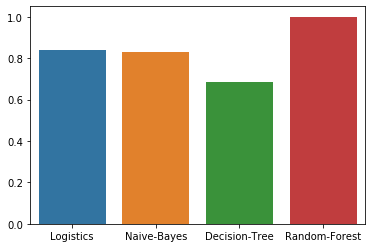

In [112]:
sns.barplot(models,test_scr)